# Intersección en Geopandas 


## Importamos las librerias 

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import os

## Definimos el directorio de las fuentes de datos 


In [ ]:
os.chdir("D:\DataScience\Portfolio\data") 

## Leemos la data
[Data](https://drive.google.com/file/d/1IthzVbkqJvxHEQFn2A6d3K4n5tlEdd1v/view?usp=sharing)

In [ ]:
### Data de viajes
df = pd.read_csv('renabap.csv', sep = ";", encoding='UTF-8')

## Mostramos el encabezado


In [ ]:
df.head()

,FECHATRX,DIA,DIASEMANA,HORA,MODO,NROTARJETA,SECUENCIA_,ID_COMBINA,CONTRATO,DESC_TRX,ENTIDAD,LINEA,MUNICIPIO,DESC_RAMAL,ESTACION,ID_SERVICI,DIRECTION,LONGITUDE,LATITUDE
0,20/11/2021 23:59:40,20,Sábado,23,COLE,1838951397,113,NaN,627 - NO REGISTRADOS,Uso,LA NUEVA METROPOL S.A.,LINEA 365,PROV,365R6,NaN,2415,0,-58.80237,-34.54181
1,20/11/2021 23:59:37,20,Sábado,23,COLE,1825273065,1387,NaN,621 - Atributo A,Uso,AZUL S.A. DE TRANSPORTE AUTOMOTOR,LINEA 203,PROV,203G,NaN,958,0,-58.59479,-34.44342
2,20/11/2021 23:59:33,20,Sábado,23,COLE,1825273065,1386,NaN,621 - Atributo A,Uso,AZUL S.A. DE TRANSPORTE AUTOMOTOR,LINEA 203,PROV,203G,NaN,958,0,-58.59479,-34.44342
3,20/11/2021 23:59:22,20,Sábado,23,COLE,1818486162,722,NaN,627 - NO REGISTRADOS,Uso,AZUL S.A. DE TRANSPORTE AUTOMOTOR,LINEA 203,PROV,203G,NaN,958,0,-58.59479,-34.44342
4,20/11/2021 23:59:17,20,Sábado,23,COLE,1818486162,721,NaN,627 - NO REGISTRADOS,Uso,AZUL S.A. DE TRANSPORTE AUTOMOTOR,LINEA 203,PROV,203G,NaN,958,0,-58.59479,-34.44342


## Graficamos los puntos

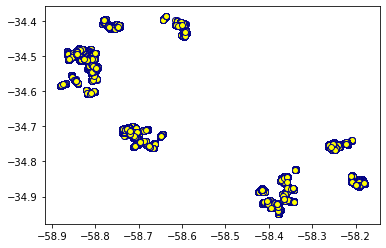

In [ ]:
plt.scatter(df.LONGITUDE, df.LATITUDE, c = 'yellow', edgecolor = 'darkblue')
plt.show()

## Importamos el shape que vamos a utilizar 
[Data](https://drive.google.com/file/d/1yI44edg4oTf8t5TDJpNoDa4QmVUrixSY/view?usp=sharing)

In [ ]:
indec_shape = gpd.read_file("buenos.zip")
indec_shape.head(5)

,link,codpcia,departamen,provincia,mujeres,varones,personas,hogares,viv_part,viv_part_h,geometry
0,02001,02,Comuna 1,Ciudad Autónoma de Buenos Aires,107789,98097,205886,84468,130771,78360,"POLYGON ((-58.37501 -34.57959, -58.36690 -34.5..."
1,02002,02,Comuna 2,Ciudad Autónoma de Buenos Aires,89890,68042,157932,73156,107967,70869,"POLYGON ((-58.40084 -34.57126, -58.40005 -34.5..."
2,02003,02,Comuna 3,Ciudad Autónoma de Buenos Aires,101936,85601,187537,80489,101161,75605,"POLYGON ((-58.39365 -34.60154, -58.39348 -34.6..."
3,02004,02,Comuna 4,Ciudad Autónoma de Buenos Aires,115079,103166,218245,76455,82926,69680,"POLYGON ((-58.35695 -34.61980, -58.35672 -34.6..."
4,06091,06,Berazategui,Buenos Aires,165636,158608,324244,93164,96025,86248,"POLYGON ((-58.01702 -34.78120, -58.08380 -34.8..."


In [ ]:
## Filtramos la localidad
tigre_gdf =indec_shape[indec_shape.departamen == "Tigre"] # Filtramos por linea
tigre_gdf.head()


,link,codpcia,departamen,provincia,mujeres,varones,personas,hogares,viv_part,viv_part_h,geometry
173,06805,06,Tigre,Buenos Aires,191607,184774,376381,108558,118416,98616,"MULTIPOLYGON (((-58.51670 -34.30193, -58.51658..."


## Creamos el Geo Data Frames

In [ ]:
### Armamos los puntos del dataframe original
df['geometry'] = df.apply(lambda x: Point(float(x.LONGITUDE), float(x.LATITUDE)), axis=1)

In [ ]:
## Creamos el geodataframe y verificamos el tipo de CRS
df_gdf = gpd.GeoDataFrame(df, crs = tigre_gdf.crs, geometry = df.geometry)
df_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
## Corroboramos el CRS de el shape importado
tigre_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Graficamos

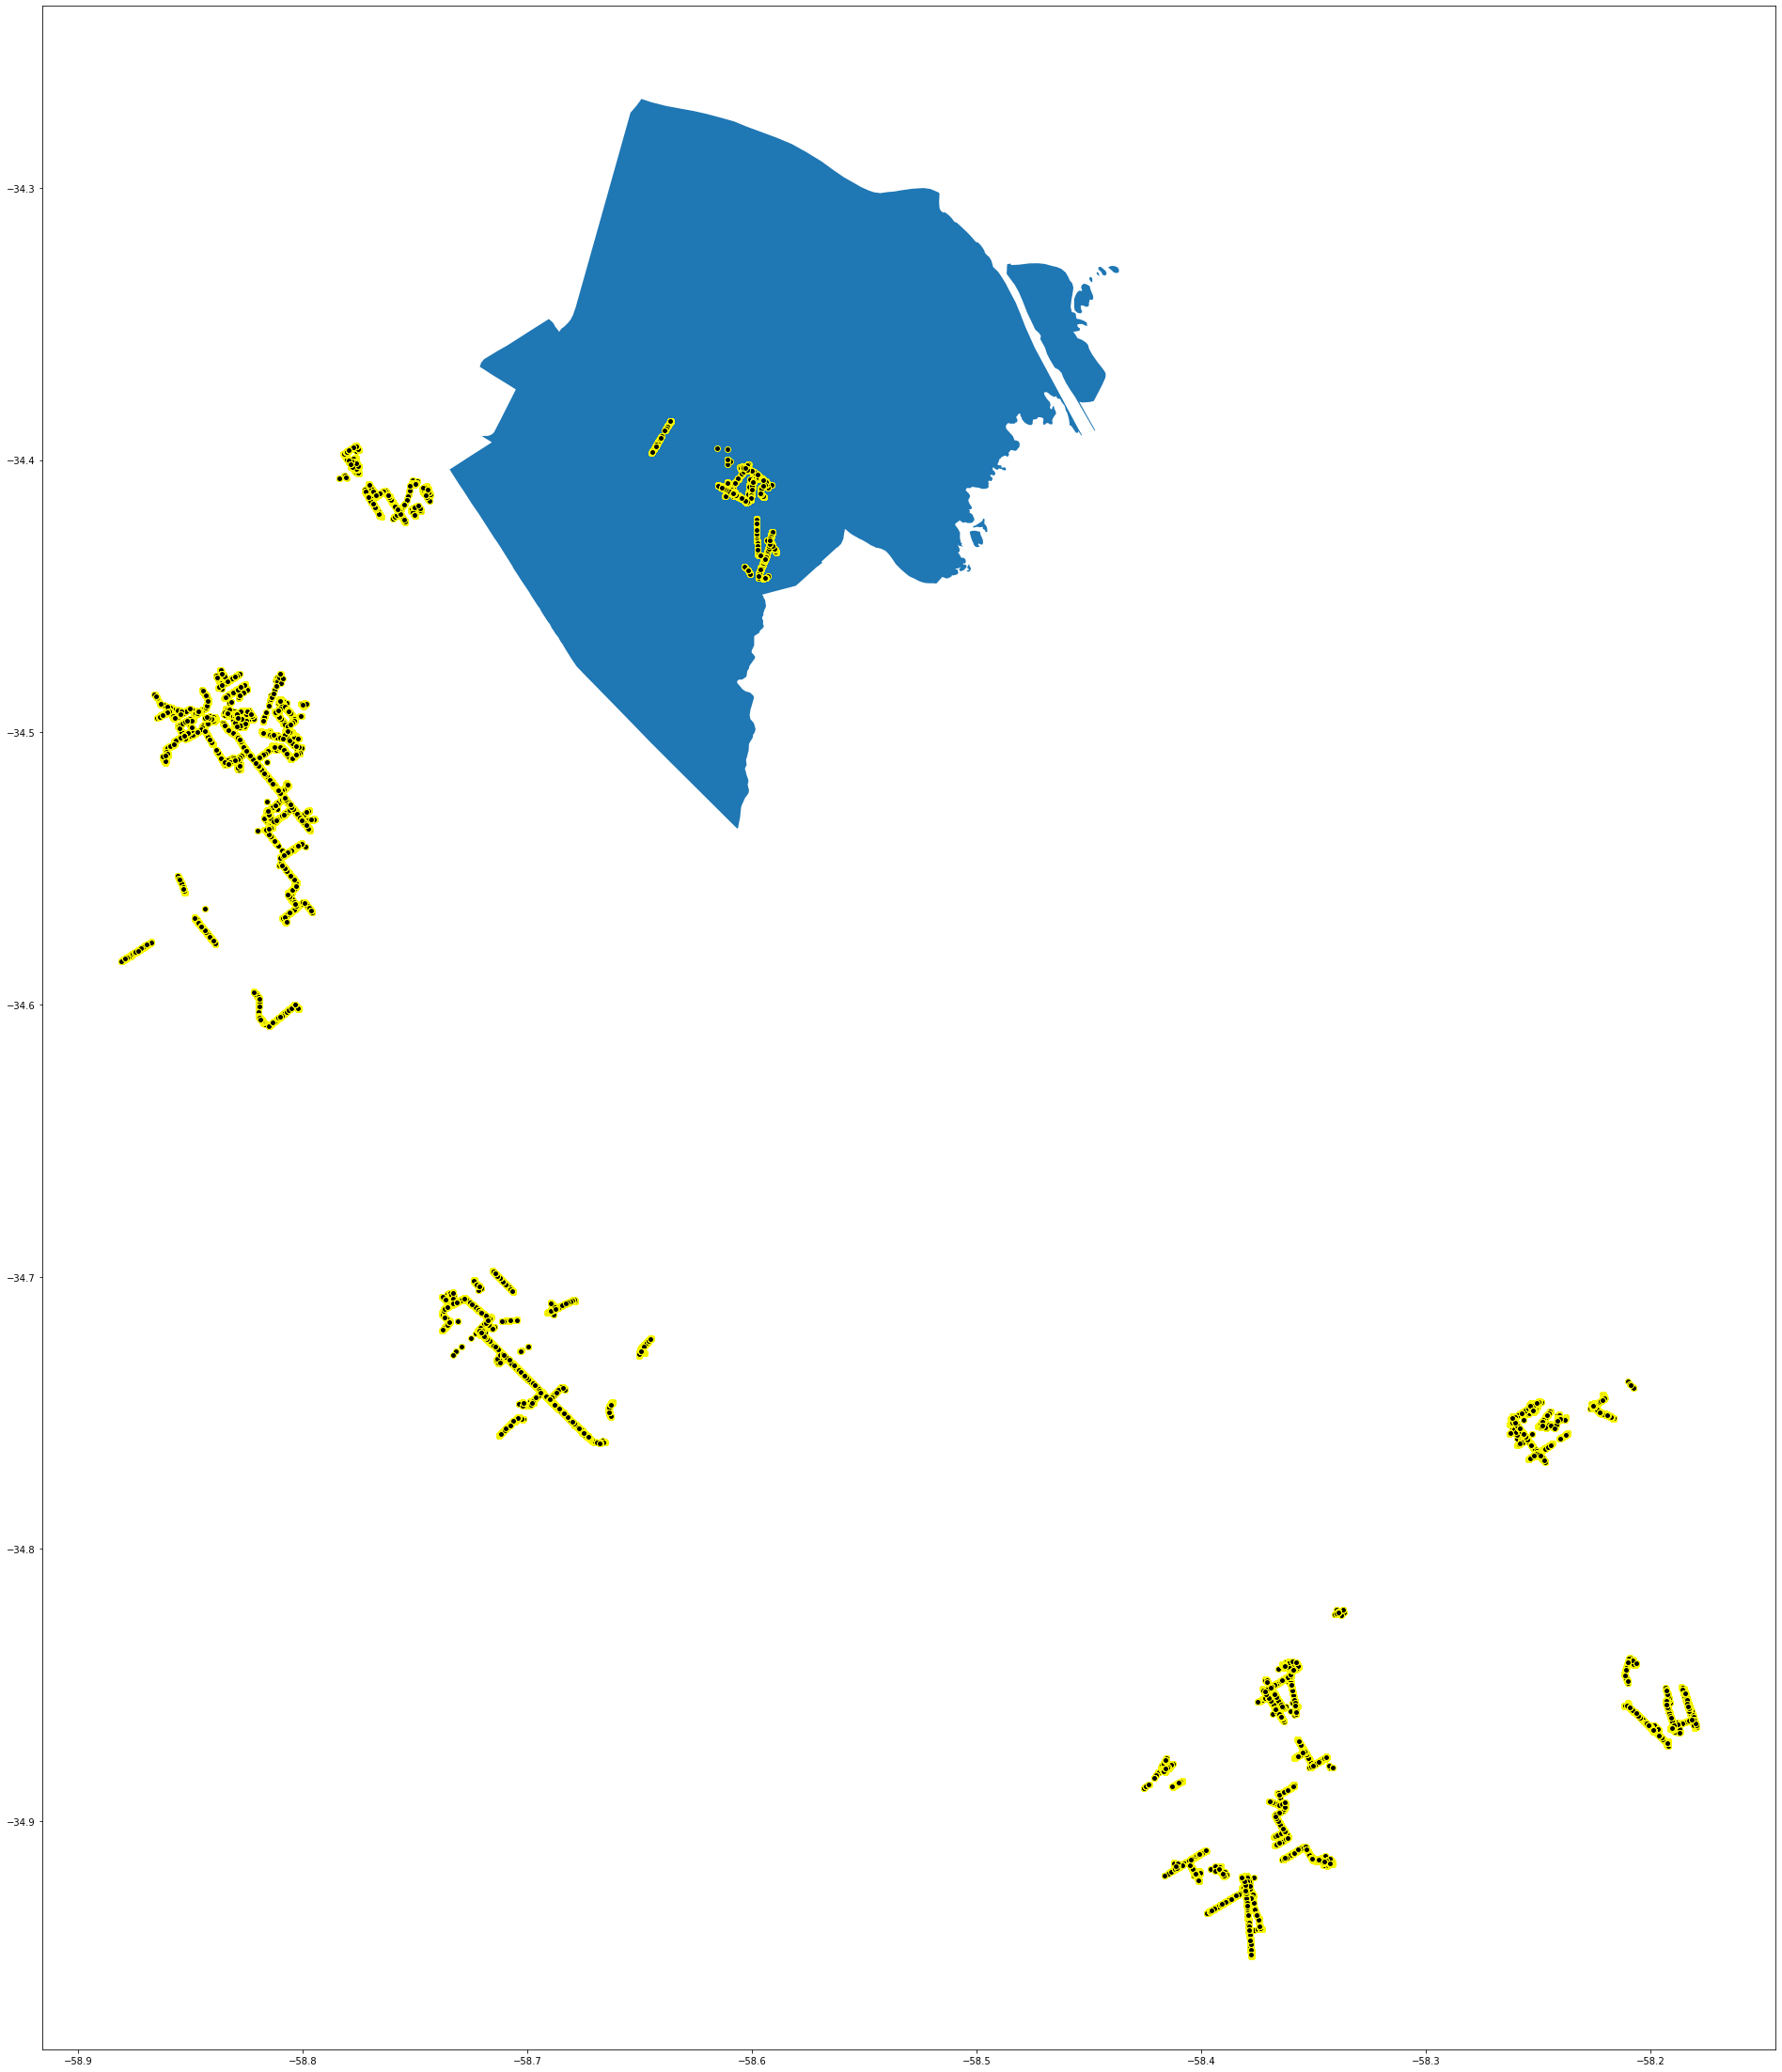

In [ ]:
tigre_gdf.plot( legend=True , figsize=(40,40))
plt.scatter(x=df_gdf.LONGITUDE, y=df_gdf.LATITUDE, c='black', edgecolor = 'yellow')

## Intersección

In [ ]:
tigre = gpd.sjoin(tigre_gdf, df_gdf, op = "intersects" )

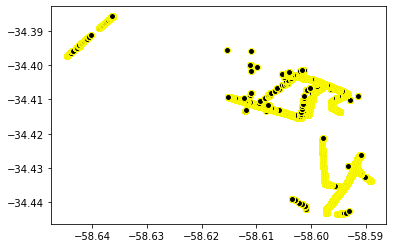

In [ ]:
plt.scatter(x=tigre.LONGITUDE, y=tigre.LATITUDE, c='black', edgecolor = 'yellow')

## Generamos el csv

In [ ]:
tigre = pd.DataFrame(tigre)
tigre = tigre.loc[ : ,"FECHATRX" : "LATITUDE"]


In [ ]:
tigre.to_csv("tigre_sub.csv")